# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import *
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
import csv
import random
from gensim.models import Word2Vec
from collections import Counter
from utils.textnormalization import TextNormalization
from utils.machinelearning import machine_learning_model, fit_model, metrics_values, confusion_matrix_
from utils.deeplearning import convolutional_neural_network_1d, model_compile, model_fit, evaluate, plot_accuracy_loss, lstm_, gru_
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import go_figure , bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
from utils.word_2_vec import word_2_vec_
import itertools
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
random.seed(40)
tf.random.set_seed(40)

# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
Train = pd.read_csv('Yelp_Train.csv', header=None)
Train.rename(columns={1: 'Review', 0: 'Sentiment'}, inplace=True)
Train = Train.sample(frac=0.20, random_state=44, ignore_index=True)
Train.head()

,Sentiment,Review
0,Negative,It is the ONLY place in concourse C that looke...
1,Negative,2 stars and five words: GO TO THE BELLAGIO INS...
2,Negative,Just had discount sprinklers at my house for a...
3,Negative,This location SUCKS!!!!! Every time i order...
4,Positive,Dear Rumor: I'd seriously suggest you fire th...


In [5]:
Test = pd.read_csv('Yelp_Test.csv', header=None)
Test.rename(columns={1: 'Review', 0: 'Sentiment'}, inplace=True)
Test.head()

,Sentiment,Review
0,Positive,"Contrary to other reviews, I have zero complai..."
1,Negative,Last summer I had an appointment to get new ti...
2,Positive,"Friendly staff, same starbucks fair you get an..."
3,Negative,The food is good. Unfortunately the service is...
4,Positive,Even when we didn't have a car Filene's Baseme...


In [6]:
Data1 = pd.read_csv('train.csv', header = None) 
Data2 = pd.read_csv('test.csv', header = None) 
Data = pd.concat([Data1, Data2], axis=0, ignore_index=True)
Data = Data[[2]]
Data.rename(columns={2: 'Review'}, inplace=True)
Data.head()

,Review
0,This sound track was beautiful! It paints the ...
1,I'm reading a lot of reviews saying that this ...
2,This soundtrack is my favorite music of all ti...
3,I truly like this soundtrack and I enjoy video...
4,"If you've played the game, you know how divine..."


# Sentiment Information

**1-Train Set**

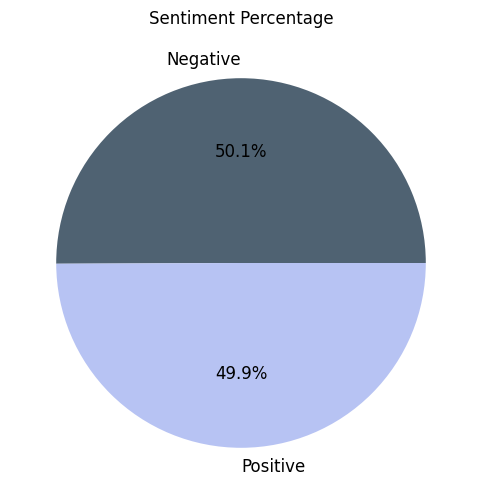

In [7]:
sentiment_percentage(Train, 'Sentiment', (6, 6))

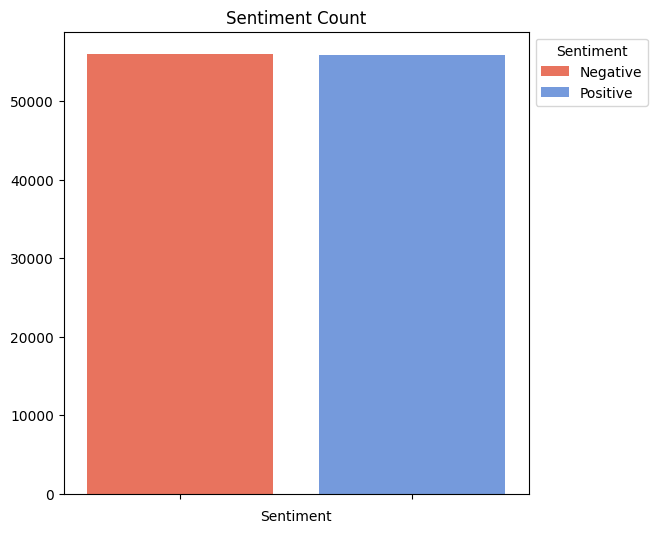

In [8]:
sentiment_counts(Train, 'Sentiment', (6, 6))

**2-Test Set**

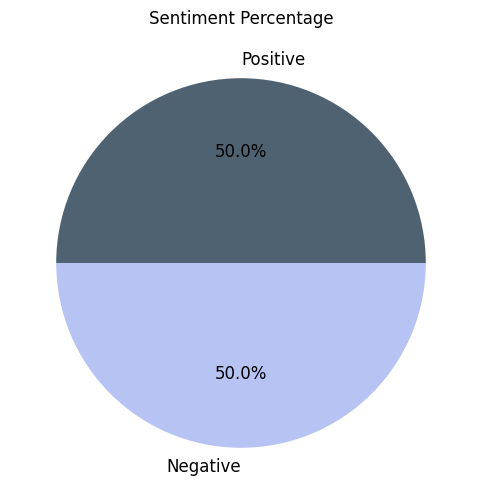

In [9]:
sentiment_percentage(Test, 'Sentiment', (6, 6))

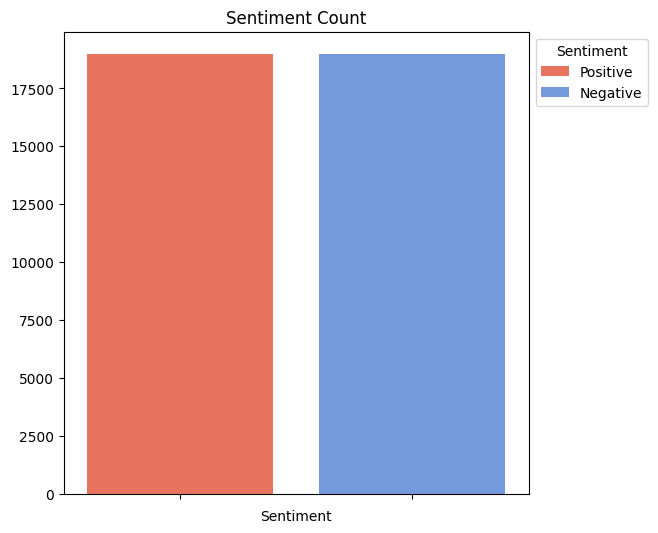

In [10]:
sentiment_counts(Test, 'Sentiment', (6, 6))

# Number Of Sentences

**1-Train**

In [11]:
Train['NumberOfSentences'] = Train['Review'].apply(lambda n:len(sent_tokenize(n)))
Train.drop(Train[Train["NumberOfSentences"] == 0].index, inplace = True)


In [12]:
Train['NumberOfSentences'].sum()

948226

**2-Test**

In [13]:
Test['NumberOfSentences'] = Test['Review'].apply(lambda n:len(sent_tokenize(n)))
Test.drop(Test[Test["NumberOfSentences"] == 0].index, inplace = True)

In [14]:
Test['NumberOfSentences'].sum()

322332

# Average Number Of Sentences

**1-Train Set**

In [15]:
AverageNumberOfSentence_Train = int(np.round(Train["NumberOfSentences"].mean()))
AverageNumberOfSentence_Train

8

**2-Test Set**

In [16]:
AverageNumberOfSentence_Test = int(np.round(Test["NumberOfSentences"].mean()))
AverageNumberOfSentence_Test

8

# Maximum Number Of Sentences

**1-Train Set**

In [17]:
MaximumNumberOfSentence_Train = Train["NumberOfSentences"].max()
MaximumNumberOfSentence_Train

87

**2-Test Set**

In [18]:
MaximumNumberOfSentence_Test = Test["NumberOfSentences"].max()
MaximumNumberOfSentence_Test

88

# Minimum Number Of Sentences

**1-Train Set**

In [19]:
MinimumNumberOfSentence_Train = Train["NumberOfSentences"].min()
MinimumNumberOfSentence_Train

1

**2-Test Set**

In [20]:
MinimumNumberOfSentence_Test = Test["NumberOfSentences"].min()
MinimumNumberOfSentence_Test

1

# Text Normalization

In [21]:
text_normalization = TextNormalization(_string_lower = True, 
                        _remove_emojis = True, 
                        _remove_hashtags = True, 
                        _remove_emails = True,
                        _remove_url = True, 
                        _remove_mention = True, 
                        _remove_duplicate_char = True,
                        _remove_single_char = True, 
                        _remove_new_line_char = True, 
                        _remove_number = True, 
                        _remove_html_tags = True, 
                        _remove_special_character = True, 
                        _remove_longest_than = True, 
                        _remove_whitespace = True, 
                        _remove_unicode_characters = True,
                        _stemmer = False, 
                        _remove_non_english = True, 
                        _remove_stop_words = True, 
                        _lemmatizer = False)

**1-Train Set**

In [22]:
Train['Normalized_Review'] = Train['Review'].apply(lambda x: text_normalization.normalization(x))
Train

,Sentiment,Review,NumberOfSentences,Normalized_Review
0,Negative,It is the ONLY place in concourse C that looke...,4,place concourse looked halfway decent best foo...
1,Negative,2 stars and five words: GO TO THE BELLAGIO INS...,1,stars words bellagio
2,Negative,Just had discount sprinklers at my house for a...,15,discount sprinklers house estimate quoted new ...
3,Negative,This location SUCKS!!!!! Every time i order...,17,location sucks time order slow rude try going ...
4,Positive,Dear Rumor: I'd seriously suggest you fire th...,19,dear rumor seriously suggest fire mean attenda...
...,...,...,...,...
111995,Positive,If I'm going for cheap good sushi. I'm going h...,10,going cheap sushi going tokyo sushi sushi tast...
111996,Negative,Bleh! I can't believe this place has so many g...,7,bleh believe place reviews quality food poor t...
111997,Negative,"Simply put, I will not be going back to this l...",12,simply put going back location set charging cu...
111998,Positive,This bar is one of Edinburgh's best kept secre...,8,bar edinburgh best kept secrets sandwiched roy...


**2-Test Set**

In [23]:
Test['Normalized_Review'] = Test['Review'].apply(lambda x: text_normalization.normalization(x))
Test

,Sentiment,Review,NumberOfSentences,Normalized_Review
0,Positive,"Contrary to other reviews, I have zero complai...",7,contrary reviews zero complaints service price...
1,Negative,Last summer I had an appointment to get new ti...,7,last summer appointment new tires wait super l...
2,Positive,"Friendly staff, same starbucks fair you get an...",2,friendly staff starbucks fair lines long
3,Negative,The food is good. Unfortunately the service is...,3,food unfortunately service hit miss issue kitc...
4,Positive,Even when we didn't have a car Filene's Baseme...,8,car filene basement worth bus trip waterfront ...
...,...,...,...,...
37995,Negative,If I could give 0...I would. Don't do it.,2,give
37996,Positive,Items Selected:\nChocolate Cinnamon Horn\nSmal...,2,items selected nchocolate cinnamon horn nsmall...
37997,Negative,Expensive lunch meals. Fried pickles were goo...,6,expensive lunch meals fried pickles waitress m...
37998,Negative,Highly overpriced and food was cold. Our waitr...,4,highly overpriced food cold waitress confused ...


# Number Of Unique Words

**1-Train Set**

In [24]:
UniqueWords_Train = set()
for word in Train['Normalized_Review'].str.split():
    UniqueWords_Train.update(word)
len(UniqueWords_Train)

94718

**2-Test Set**

In [25]:
UniqueWords_Test = set()
for word in Test['Normalized_Review'].str.split():
    UniqueWords_Test.update(word)
len(UniqueWords_Test)

57087

# WordCloud

**1-Train Set**

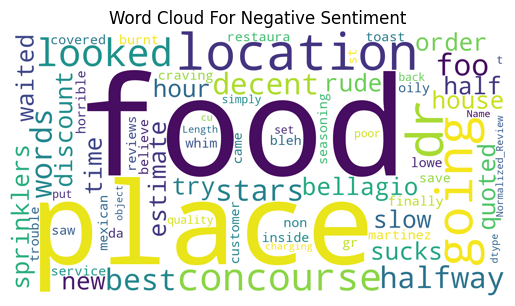

In [26]:
wordcloud(data=Train, target='Negative', width=1500, hieght=800, text='Normalized_Review')

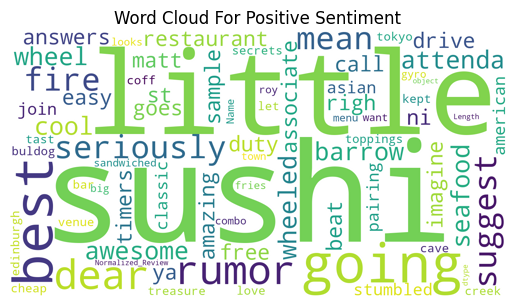

In [27]:
wordcloud(data=Train, target='Positive', width=1500, hieght=800, text='Normalized_Review')

**2-Test Set**

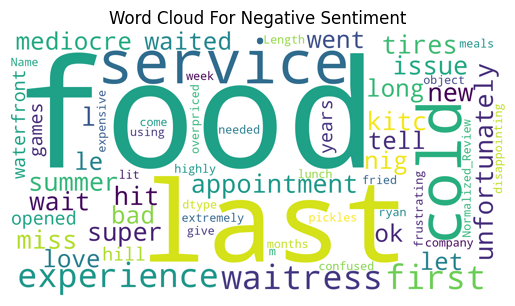

In [28]:
wordcloud(data=Test, target='Negative', width=1500, hieght=800, text='Normalized_Review')

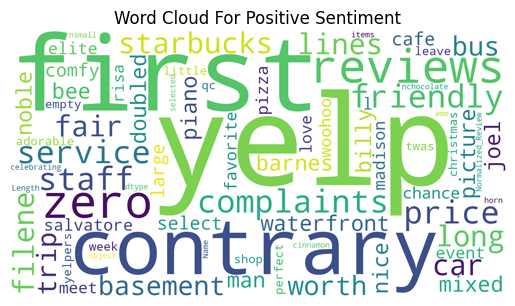

In [29]:
wordcloud(data=Test, target='Positive', width=1500, hieght=800, text='Normalized_Review')

# Most Frequent Words 

**1-Train Set**

In [30]:
MostFrequentWord_Train = Counter((Train['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF_Train = pd.DataFrame(MostFrequentWord_Train, columns=('Word', 'Count'))
MostFrequentWordDF_Train

,Word,Count
0,food,65401
1,place,64703
2,like,52631
3,time,42955
4,great,41863
5,service,41356
6,back,39216
7,ni,26540
8,nthe,23992
9,ordered,21793


In [31]:
go_figure(data=MostFrequentWordDF_Train)

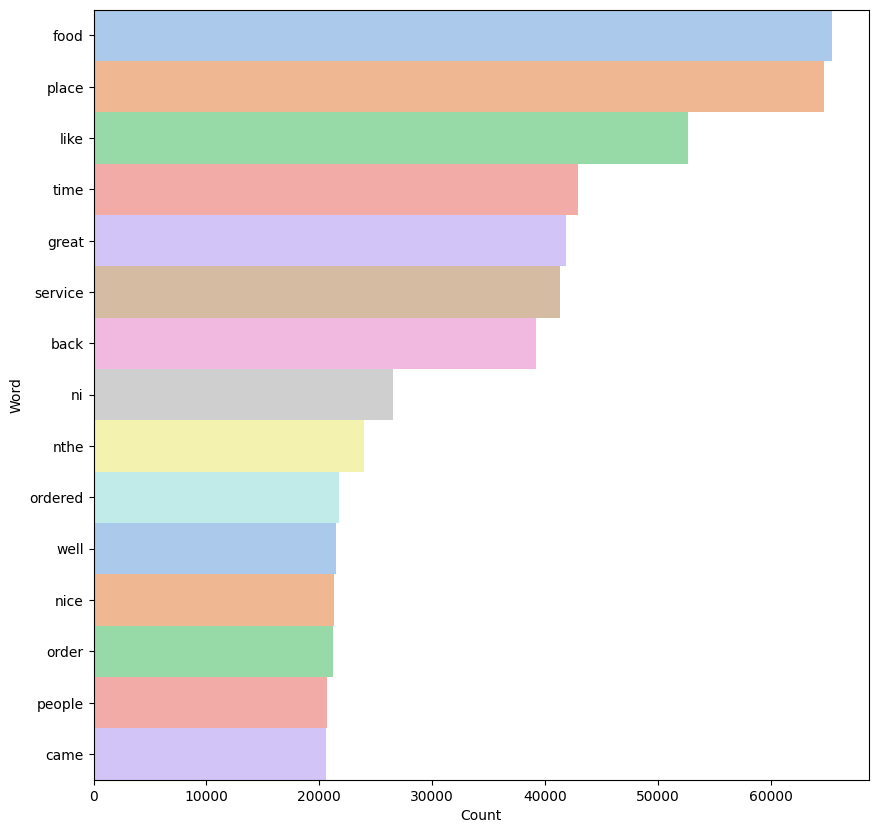

In [32]:
bar_plot(data=MostFrequentWordDF_Train)

**2-Test Set**

In [33]:
MostFrequentWord_Test = Counter((Test['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF_Test = pd.DataFrame(MostFrequentWord_Test, columns=('Word', 'Count'))
MostFrequentWordDF_Test

,Word,Count
0,food,22360
1,place,21603
2,like,17839
3,time,14787
4,great,14665
5,service,14081
6,back,13356
7,ni,8975
8,nthe,8251
9,well,7361


In [34]:
go_figure(data=MostFrequentWordDF_Test)

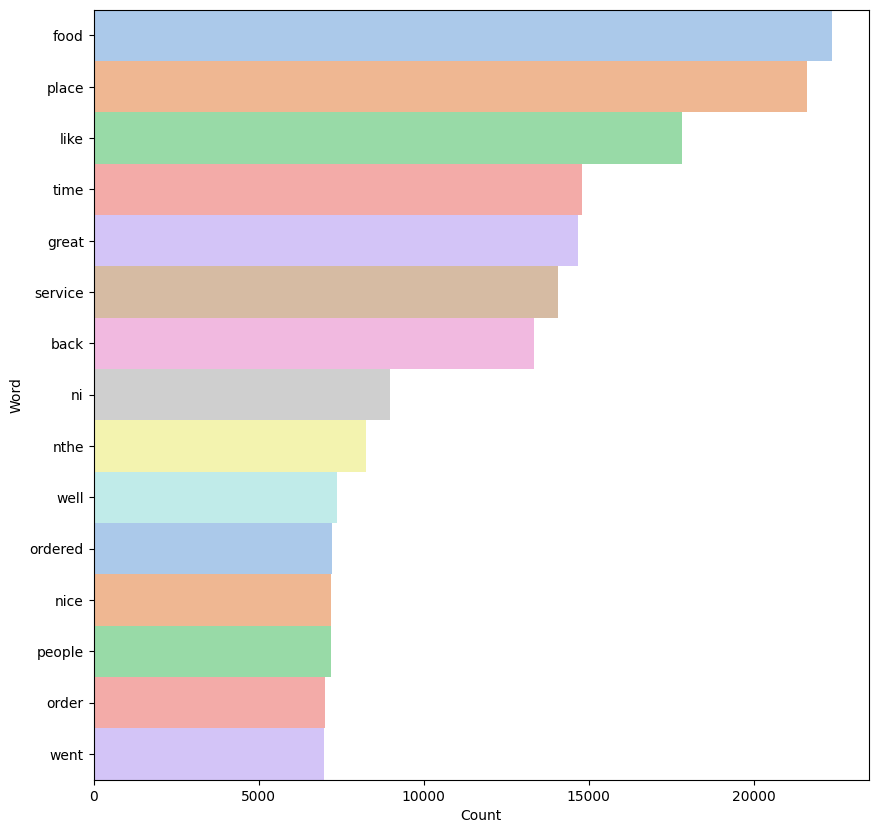

In [35]:
bar_plot(data=MostFrequentWordDF_Test)

# Number Of Words 

**1-Train Set**

In [36]:
Train["Number of Words"] = Train["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Train["Number of Words"].sum()

6410125

In [37]:
Train.drop(Train[Train["Number of Words"] == 0].index, inplace = True)

**2-Test Set**

In [38]:
Test["Number of Words"] = Test["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Test["Number of Words"].sum()

2172257

In [39]:
Test.drop(Test[Test["Number of Words"] == 0].index, inplace = True)

# Number Of Charachters 

**1-Train Test**

In [40]:
Train["Number of Charachters"] = Train["Normalized_Review"].str.len()
Train["Number of Charachters"].sum()

42595817

**2-Test Set**

In [41]:
Test["Number of Charachters"] = Test["Normalized_Review"].str.len()
Test["Number of Charachters"].sum()

14439720

# Average Number Of Words 

**1-Train Set**

In [42]:
AverageNaumberOfWords_Train = int(np.round((Train["Number of Words"].mean())))
AverageNaumberOfWords_Train

57

**2-Test Set**

In [43]:
AverageNaumberOfWords_Test = int(np.round((Test["Number of Words"].mean())))
AverageNaumberOfWords_Test

57

# Average Number Of Charachters 

**1-Train Set**

In [44]:
AverageNumberOfCharachters_Train = int(np.round(Train["Number of Charachters"].mean()))
AverageNumberOfCharachters_Train

380

**2-Test Set**

In [45]:
AverageNumberOfCharachters_Test = int(np.round(Test["Number of Charachters"].mean()))
AverageNumberOfCharachters_Test

380

# Maximum Number Of Word

**1-Train Set**

In [46]:
MaximumNaumberOfWords_Train = Train["Number of Words"].max()
MaximumNaumberOfWords_Train

678

**2-Test Set**

In [47]:
MaximumNaumberOfWords_Test = Test["Number of Words"].max()
MaximumNaumberOfWords_Test

534

# Maximum Number Of Charachters 

**1-Train Set**

In [48]:
MaximumNumberOfCharachters_Train = Train['Number of Charachters'].max() 
MaximumNumberOfCharachters_Train

3804

**2-Test Set**

In [49]:
MaximumNumberOfCharachters_Test = Test['Number of Charachters'].max() 
MaximumNumberOfCharachters_Test

3376

# Minimum Number Of Words

**1-Train Set**

In [50]:
MimimumNaumberOfWords_Train = Train["Number of Words"].min()
MimimumNaumberOfWords_Train

1

**2-Test Set**

In [51]:
MimimumNaumberOfWords_Test = Test["Number of Words"].min()
MimimumNaumberOfWords_Test

1

# Minimum Number Of Charachters 

**1-Train Set**

In [52]:
MinimumNumberOfCharachters_Train = Train['Number of Charachters'].min() 
MinimumNumberOfCharachters_Train

2

**2-Test Set**

In [53]:
MinimumNumberOfCharachters_Test = Test['Number of Charachters'].min() 
MinimumNumberOfCharachters_Test

2

# Split The Dataset Into Training And Testing

In [54]:
X_train, X_test, y_train, y_test = Train['Normalized_Review'], Test['Normalized_Review'], Train['Sentiment'], Test['Sentiment']

# Encoding Dependent Variables (Y) Into Integer

In [55]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# CountVectorizer

In [56]:
CountVectorizer_ = CountVectorizer()
X_train_CV_ = CountVectorizer_.fit_transform(X_train)
X_test_CV_ = CountVectorizer_.transform(X_test)

In [57]:
Voc = CountVectorizer_.vocabulary_
Voc

{'place': 64271,
 'concourse': 16051,
 'looked': 44356,
 'halfway': 33905,
 'decent': 19485,
 'best': 7242,
 'food': 28920,
 'okay': 59887,
 'portion': 65182,
 'reasonable': 68492,
 'smaller': 76845,
 'expected': 26270,
 'mexican': 47543,
 'frankly': 29450,
 'prices': 66100,
 'bad': 5378,
 'nof': 55794,
 'course': 17406,
 'metal': 47456,
 'silverware': 75944,
 'service': 74553,
 'step': 79454,
 'tsa': 85542,
 'exactly': 25954,
 'great': 32782,
 'nand': 50453,
 'beer': 6649,
 'non': 55909,
 'alcholoic': 1720,
 'drinks': 22839,
 'bit': 7868,
 'expensive': 26308,
 'offer': 59731,
 'shot': 75457,
 'going': 32170,
 'stars': 79197,
 'words': 93159,
 'bellagio': 6904,
 'discount': 21417,
 'sprinklers': 78729,
 'house': 36266,
 'estimate': 25616,
 'quoted': 67687,
 'new': 53009,
 'pvc': 67271,
 'pipe': 64046,
 'set': 74612,
 'valves': 89637,
 'back': 5281,
 'yard': 93745,
 'old': 59922,
 'leaking': 42936,
 'needed': 52595,
 'replaced': 69869,
 'ask': 4001,
 'long': 44293,
 'take': 81851,
 'hou

# Machine Learning

**1-Naive Bayes**

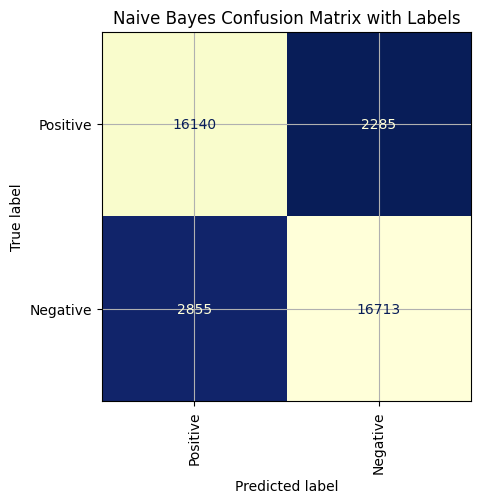

In [58]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Naive_Bayes, X_test=X_test_CV_, y_test=y_test, name='Naive Bayes')

In [59]:
metrics_values(model= Naive_Bayes, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.864712
Precision,0.854099
Recall,0.879724
F1Score,0.866722
Error,0.135288


**2-Logistic Regression**

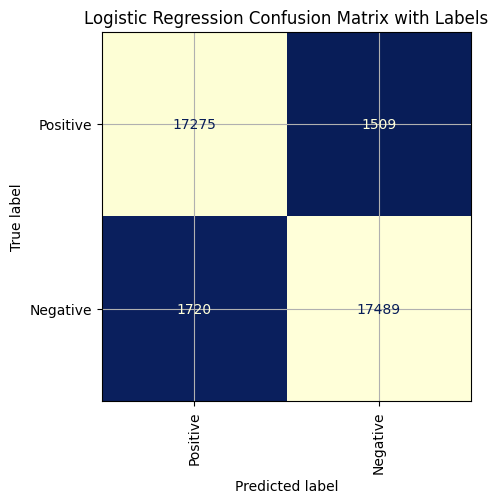

In [60]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(Logistic_Regression, X_test=X_test_CV_, y_test=y_test, name='Logistic Regression')

In [61]:
metrics_values(model= Logistic_Regression, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.915011
Precision,0.910459
Recall,0.920571
F1Score,0.915487
Error,0.084989


**3-Decision Tree**

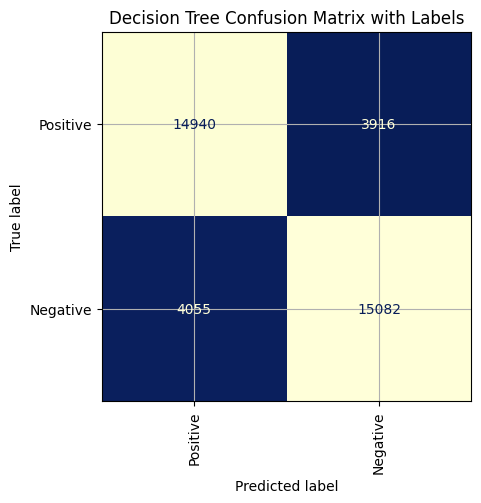

In [62]:
Algorithm = DecisionTreeClassifier(criterion='gini')
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Decision_Tree, X_test=X_test_CV_, y_test=y_test, name='Decision Tree')

In [63]:
metrics_values(model= Decision_Tree, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.790198
Precision,0.788107
Recall,0.793873
F1Score,0.790979
Error,0.209802


**4-K Nearest Neighbors**

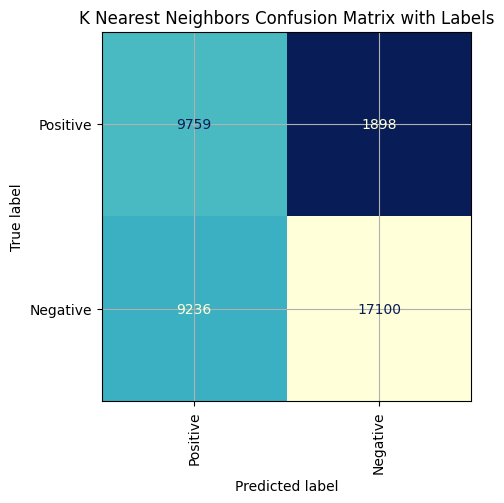

In [64]:
Algorithm =KNeighborsClassifier(metric='manhattan', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test, name='K Nearest Neighbors')

In [65]:
metrics_values(model= K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.706946
Precision,0.649301
Recall,0.900095
F1Score,0.754401
Error,0.293054


**5-Random Forest**

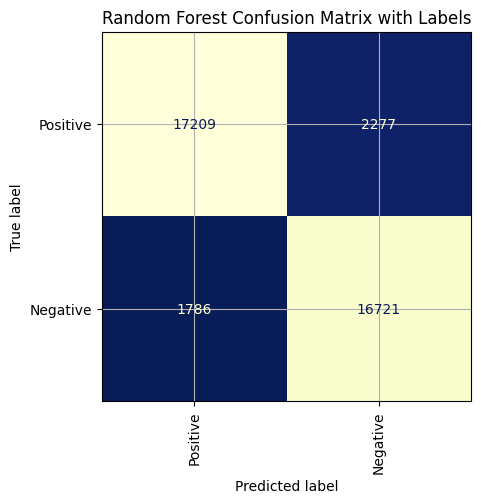

In [66]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=200)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Random_Forest, X_test=X_test_CV_, y_test=y_test, name='Random Forest')

In [67]:
metrics_values(model= Random_Forest, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.893059
Precision,0.903496
Recall,0.880145
F1Score,0.891668
Error,0.106941


**6-SGD Classifier**

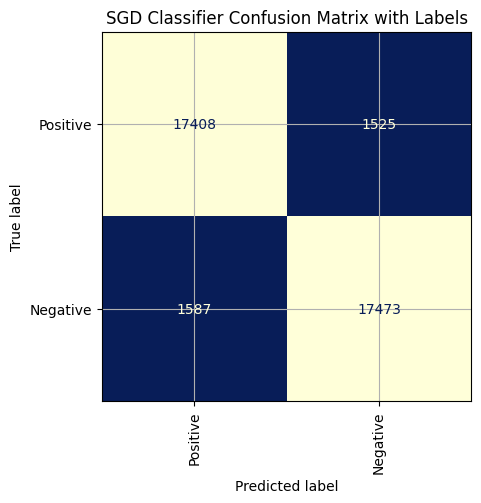

In [68]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=SGD, X_test=X_test_CV_, y_test=y_test, name='SGD Classifier')

In [69]:
metrics_values(model= SGD, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.918090
Precision,0.916737
Recall,0.919728
F1Score,0.918230
Error,0.081910


# Build Word2Vec

In [70]:
word_2_vec_(data = Data['Review'], vector_size=100, sg = 0, name = 'Word2Vec100D')

# Deep Learning

In [71]:
tokenizer, vocab_size, max_length, encoded_X_train , encoded_X_test = deeplearning_preprcosesing_(X_train=X_train, X_test=X_test,  truncating='pre', padding='pre')
embedding_dim = 100

In [72]:
Word_2_Vec_100D = './Word2Vec100D.txt'
embedding_dic = {}
with open(Word_2_Vec_100D) as f:
    for line in f:
        values = line.split()
        word = values[0]
        x = np.asarray(values[1:], dtype='float32')
        embedding_dic[word] = x

In [73]:
embedding_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_dic.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [74]:
print('The Vocab Size Is :',vocab_size)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 94719

The Max Length Is : 678


In [75]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    patience=3
                )

**7-Convolutional Neural Network**

Epoch 1/10
3500/3500 [==============================] - 38s 10ms/step - loss: 0.3811 - accuracy: 0.8446 - val_loss: 0.3133 - val_accuracy: 0.8778
Epoch 2/10
3500/3500 [==============================] - 35s 10ms/step - loss: 0.3129 - accuracy: 0.8782 - val_loss: 0.2940 - val_accuracy: 0.8849
Epoch 3/10
3500/3500 [==============================] - 36s 10ms/step - loss: 0.3193 - accuracy: 0.8770 - val_loss: 0.3178 - val_accuracy: 0.8763
Epoch 4/10
3500/3500 [==============================] - 36s 10ms/step - loss: 0.3425 - accuracy: 0.8664 - val_loss: 0.3184 - val_accuracy: 0.8744
Epoch 5/10
3500/3500 [==============================] - 35s 10ms/step - loss: 0.3395 - accuracy: 0.8677 - val_loss: 0.3175 - val_accuracy: 0.8752


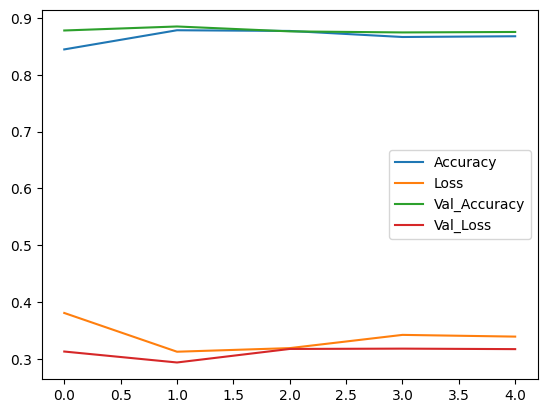

 
The Training Loss is 0.3184, And Training Accuracy is 0.8765
 
The Testing Loss is 0.3175, And Testing Accuracy is 0.8752


In [76]:
convolutional_neural_network = convolutional_neural_network_1d(vocab_size=vocab_size + 1, embedding_dim=embedding_dim, max_length=max_length, dropout=0.1, kernel=2, filters=32, strides=2, padding='valid', embeddings_matrix = embedding_matrix)
model_compile(model=convolutional_neural_network)
history = model_fit(model=convolutional_neural_network, X_train=encoded_X_train, y_train=y_train, epochs=10, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=convolutional_neural_network, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=convolutional_neural_network, x=encoded_X_test, y=y_test, train_test='Testing')

**8-LSTM**

Epoch 1/15
3500/3500 [==============================] - 185s 53ms/step - loss: 0.2729 - accuracy: 0.8855 - val_loss: 0.2222 - val_accuracy: 0.9073
Epoch 2/15
3500/3500 [==============================] - 188s 54ms/step - loss: 0.2287 - accuracy: 0.9053 - val_loss: 0.2157 - val_accuracy: 0.9117
Epoch 3/15
3500/3500 [==============================] - 187s 54ms/step - loss: 0.2143 - accuracy: 0.9110 - val_loss: 0.2142 - val_accuracy: 0.9116
Epoch 4/15
3500/3500 [==============================] - 186s 53ms/step - loss: 0.2289 - accuracy: 0.9058 - val_loss: 0.2155 - val_accuracy: 0.9113
Epoch 5/15
3500/3500 [==============================] - 182s 52ms/step - loss: 0.2085 - accuracy: 0.9144 - val_loss: 0.2084 - val_accuracy: 0.9155
Epoch 6/15
3500/3500 [==============================] - 179s 51ms/step - loss: 0.1963 - accuracy: 0.9192 - val_loss: 0.2080 - val_accuracy: 0.9152
Epoch 7/15
3500/3500 [==============================] - 179s 51ms/step - loss: 0.1832 - accuracy: 0.9262 - val_loss: 0

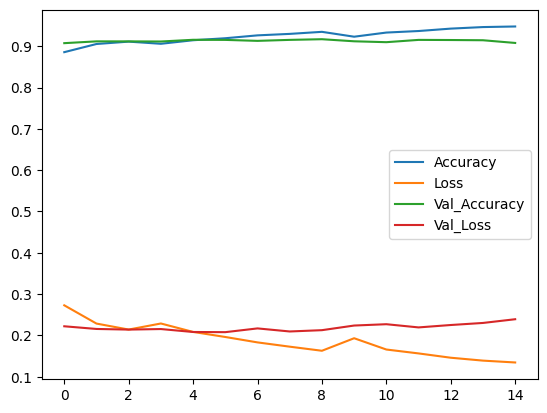

 
The Training Loss is 0.1287, And Training Accuracy is 0.9529
 
The Testing Loss is 0.2392, And Testing Accuracy is 0.9078


In [77]:
LSTM =lstm_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.1, units=64, embeddings_matrix = embedding_matrix)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=y_train, epochs=15, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=LSTM, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=LSTM, x=encoded_X_test,y= y_test, train_test='Testing')

**9-GRU**

Epoch 1/15
1750/1750 [==============================] - 115s 65ms/step - loss: 0.3084 - accuracy: 0.8631 - val_loss: 0.2197 - val_accuracy: 0.9102
Epoch 2/15
1750/1750 [==============================] - 114s 65ms/step - loss: 0.2230 - accuracy: 0.9097 - val_loss: 0.2093 - val_accuracy: 0.9141
Epoch 3/15
1750/1750 [==============================] - 119s 68ms/step - loss: 0.2413 - accuracy: 0.8996 - val_loss: 0.2181 - val_accuracy: 0.9106
Epoch 4/15
1750/1750 [==============================] - 115s 66ms/step - loss: 0.2078 - accuracy: 0.9150 - val_loss: 0.2124 - val_accuracy: 0.9153
Epoch 5/15
1750/1750 [==============================] - 115s 66ms/step - loss: 0.2068 - accuracy: 0.9152 - val_loss: 0.2145 - val_accuracy: 0.9117
Epoch 6/15
1750/1750 [==============================] - 115s 65ms/step - loss: 0.2042 - accuracy: 0.9165 - val_loss: 0.2102 - val_accuracy: 0.9149
Epoch 7/15
1750/1750 [==============================] - 115s 66ms/step - loss: 0.1966 - accuracy: 0.9206 - val_loss: 0

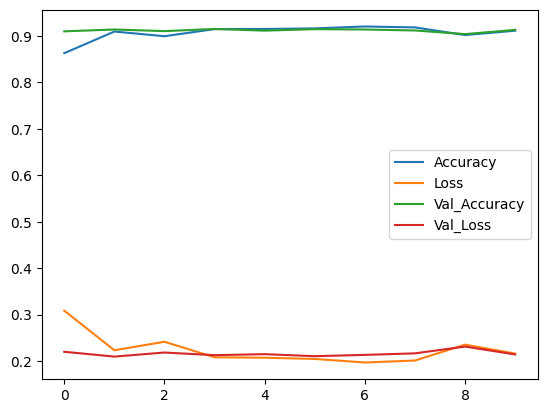

 
The Training Loss is 0.1930, And Training Accuracy is 0.9222
 
The Testing Loss is 0.2139, And Testing Accuracy is 0.9133


In [78]:
GRU_=gru_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.2, units=64, embeddings_matrix = embedding_matrix)
model_compile(model=GRU_)
history = model_fit(model=GRU_, X_train=encoded_X_train, y_train=y_train, epochs=15, X_test=encoded_X_test, y_test=y_test, batch_size=64, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=GRU_, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=GRU_, x=encoded_X_test,y= y_test, train_test='Testing')  